$$
y = mx + b
$$

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
df =  pd.read_csv('data/Salary_Data.csv') 

In [86]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [52]:
df.sample(5)

,YearsExperience,Salary
9,3.7,57189.0
8,3.2,64445.0
15,4.9,67938.0
16,5.1,66029.0
4,2.2,39891.0


In [53]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


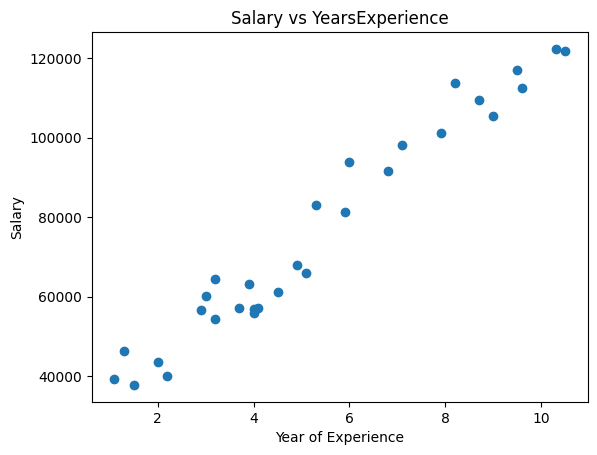

In [127]:
plt.scatter(x=df.YearsExperience, y=df.Salary)
plt.title('Salary vs YearsExperience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [128]:
X = df.drop(columns=['Salary'])
y = df['Salary']

In [129]:
# research shows that randon_state 0 45 90 often gives good results, but not guranteed
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
x_train

,YearsExperience
3,2.0
20,6.8
7,3.2
16,5.1
25,9.0
18,5.9
11,4.0
19,6.0
4,2.2
8,3.2


In [63]:
x_test

,YearsExperience
29,10.5
15,4.9
14,4.5
10,3.9
27,9.6
28,10.3


In [64]:
y_train

3      43525.0
20     91738.0
7      54445.0
16     66029.0
25    105582.0
18     81363.0
11     55794.0
19     93940.0
4      39891.0
8      64445.0
13     57081.0
22    101302.0
6      60150.0
2      37731.0
5      56642.0
12     56957.0
17     83088.0
23    113812.0
0      39343.0
9      57189.0
21     98273.0
26    116969.0
24    109431.0
1      46205.0
Name: Salary, dtype: float64

In [65]:
y_test

29    121872.0
15     67938.0
14     61111.0
10     63218.0
27    112635.0
28    122391.0
Name: Salary, dtype: float64

In [130]:
model = LinearRegression()

In [131]:
model.fit(x_train, y_train)

LinearRegression()

In [132]:
# take out model intercept and slope, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.coef_, '* X + ', model.intercept_)

26780.09915062818
[9312.57512673]
y =  [9312.57512673] * X +  26780.09915062818


In [75]:
print(model.coef_*3.2 + model.intercept_)

[56396.99631687]


In [79]:
model.predict([[5], [1.1]])

/home/uzairwayne/.cache/pypoetry/virtualenvs/pgd-machine-learning-TOyQybo7-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([73860.1006642 , 36023.37457831])

In [133]:
#predict
y_pred = model.predict(x_test)

In [82]:
print(y_pred)

[127219.58616995  72889.92820046  69009.2383455   63188.20356305
 118488.03399628 125279.24124246]


In [84]:
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))


MSE =  26350211.99562599
R2 =  0.9656445475362417
RMSE =  5133.245756402667


In [115]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'MAE': y_test - y_pred, 'MSE': pow(y_test - y_pred, 2), 'RMSE': np.sqrt(pow(y_test - y_pred, 2))})

,y_test,y_pred,MAE,MSE,RMSE
2,37731.0,40748.961841,-3017.961841,9.108094e+06,3017.961841
28,122391.0,122699.622956,-308.622956,9.524813e+04,308.622956
13,57081.0,64961.657170,-7880.657170,6.210476e+07,7880.657170
10,63218.0,63099.142145,118.857855,1.412719e+04,118.857855
26,116969.0,115249.562855,1719.437145,2.956464e+06,1719.437145
24,109431.0,107799.502753,1631.497247,2.661783e+06,1631.497247


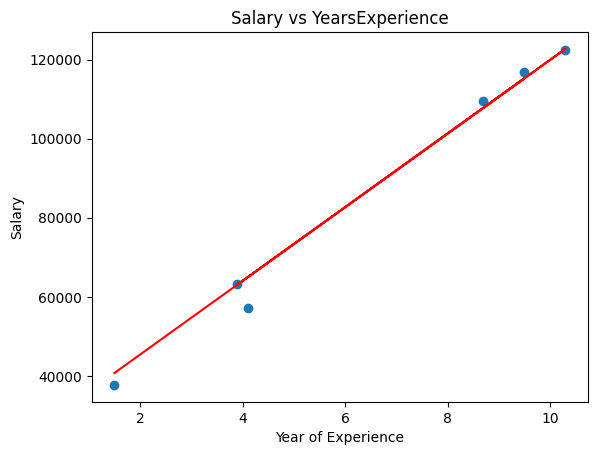

In [138]:
plt.scatter(x=x_test, y= y_test)
plt.plot(x_test, y_pred, color='r')
plt.title('Salary vs YearsExperience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

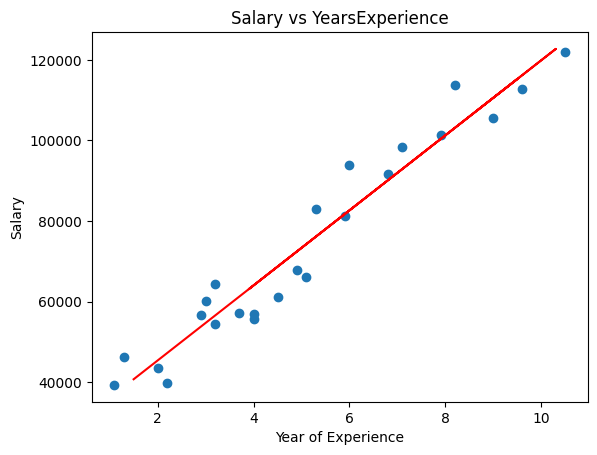

In [139]:
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, y_pred, color='r')
plt.title('Salary vs YearsExperience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()